In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize 

%matplotlib inline

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv("encoded_smartphone_data.csv")

In [3]:
df.head()

Unnamed: 0    Brand                                              Model  \
0           0      ZTE                 Blade 20 Smart Global TD-LTE 128GB   
1           1  Samsung       SM-G6200 Galaxy A6s Dual SIM TD-LTE CN 128GB   
2           2       LG           LMV450VMB V50 ThinQ 5G TD-LTE US V450VMB   
3           3   Huawei  Y5 Lite 2018 Dual SIM LTE LATAM CAG-LX3 / CAG-L23   
4           4    Nokia                        4.2 Dual SIM TD-LTE AM 32GB   

             Added  Width  Height  Depth        Volume  Band Count  \
0   1/1/2020 12:55   76.6  162.91   8.95  111686.20870          14   
1  11/7/2018 22:32   76.5  156.30   8.40  100438.38000          21   
2   3/5/2019 23:31   76.1  159.20   8.30  100555.49600          20   
3  5/10/2018 20:11   73.7  145.10   9.45  101057.07150          12   
4  8/14/2019 15:07   71.3  148.95   8.39   89102.93265          21   

   RAM_TYPE_DDR SDRAM  ...  \
0                   0  ...   
1                   0  ...   
2                   0  ...   
3                   0  ...   
4                   0  ...   

   ProtectionFromLiquids_5 Protected against low pressure jets (all directions), limited ingress  \
0                                                  0                                               
1                                                  0                                               
2                                                  0                                               
3                                                  0                                               
4                                                  0                                               

   ProtectionFromLiquids_6 Protection against powerful jets of water  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   ProtectionFromLiquids_7 Protected against immersion up to 1m of depth  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth  \
0                                                  0                        
1                                                  0                        
2                                                  1                        
3                                                  0                        
4                                                  0                        

   ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

   ProtectionFromLiquids_Non-standard protection  ProtectionFromLiquids_Yes  \
0                                              0                          1   
1                                              0                          1   
2                                              0                          0   
3                                              0                          1   
4                                         

In [84]:
#drop non-numerical columns
df = df.drop(labels=['Unnamed: 0', 'Brand', 'Model', 'Added'], axis=1)
df.head()

Width  Height  Depth        Volume  Band Count  RAM_TYPE_DDR SDRAM  \
0   76.6  162.91   8.95  111686.20870          14                   0   
1   76.5  156.30   8.40  100438.38000          21                   0   
2   76.1  159.20   8.30  100555.49600          20                   0   
3   73.7  145.10   9.45  101057.07150          12                   0   
4   71.3  148.95   8.39   89102.93265          21                   0   

   RAM_TYPE_DDR2 SDRAM  RAM_TYPE_DDR3 SDRAM  RAM_TYPE_DDR3L SDRAM  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   RAM_TYPE_EDO DRAM  ...  \
0                  0  ...   
1                  0  ...   
2                  0  ...   
3                  0  ...   
4                  0  ...   

   ProtectionFromLiquids_5 Protected against low pressure jets (all directions), limited ingress  \
0                                                  0                                               
1                                                  0                                               
2                                                  0                                               
3                                                  0                                               
4                                                  0                                               

   ProtectionFromLiquids_6 Protection against powerful jets of water  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   ProtectionFromLiquids_7 Protected against immersion up to 1m of depth  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth  \
0                                                  0                        
1                                                  0                        
2                                                  1                        
3                                                  0                        
4                                                  0                        

   ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

   ProtectionFromLiquids_Non-standard protection  ProtectionFromLiquids_Yes  \
0                                              0                          1   
1                                              0                          1   
2                                              0                          0   
3                                              0                          1   
4                                              0                          1   

In [6]:
#separate features of dataframe from labels
X = df_drop.iloc[:, 1:149].values
y = df_drop.iloc[:, 0].values

X

array([[1.62910000e+02, 8.95000000e+00, 1.11686209e+05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.56300000e+02, 8.40000000e+00, 1.00438380e+05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.59200000e+02, 8.30000000e+00, 1.00555496e+05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.37400000e+02, 1.84000000e+01, 2.07309120e+05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.25000000e+02, 1.40000000e+01, 1.08500000e+05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17000000e+02, 1.80000000e+01, 1.46788200e+05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
y

array([76.6, 76.5, 76.1, ..., 82. , 62. , 69.7])

In [9]:
print("shape of X", np.shape(X))
print("shape of y", np.shape(y)) #13569 rows, 1 column

shape of X (13569, 148)
shape of y (13569,)


In [49]:
#standardize the data
X_std = StandardScaler().fit_transform(X)

In [11]:
#compute covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0000737  -0.326377    0.26302761 ... -0.05813207 -0.04106976
   0.06813514]
 [-0.326377    1.0000737   0.70541692 ...  0.13575852  0.05775218
  -0.14957119]
 [ 0.26302761  0.70541692  1.0000737  ...  0.04188223  0.01839563
  -0.04628833]
 ...
 [-0.05813207  0.13575852  0.04188223 ...  1.0000737  -0.10689144
  -0.96863238]
 [-0.04106976  0.05775218  0.01839563 ... -0.10689144  1.0000737
  -0.14383846]
 [ 0.06813514 -0.14957119 -0.04628833 ... -0.96863238 -0.14383846
   1.0000737 ]]


In [12]:
# could also use np.cov to calculate covariance matrix
# print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.0000737  -0.326377    0.26302761 ... -0.05813207 -0.04106976
   0.06813514]
 [-0.326377    1.0000737   0.70541692 ...  0.13575852  0.05775218
  -0.14957119]
 [ 0.26302761  0.70541692  1.0000737  ...  0.04188223  0.01839563
  -0.04628833]
 ...
 [-0.05813207  0.13575852  0.04188223 ...  1.0000737  -0.10689144
  -0.96863238]
 [-0.04106976  0.05775218  0.01839563 ... -0.10689144  1.0000737
  -0.14383846]
 [ 0.06813514 -0.14957119 -0.04628833 ... -0.96863238 -0.14383846
   1.0000737 ]]


Text(0.5, 1.0, 'Correlation between different features')

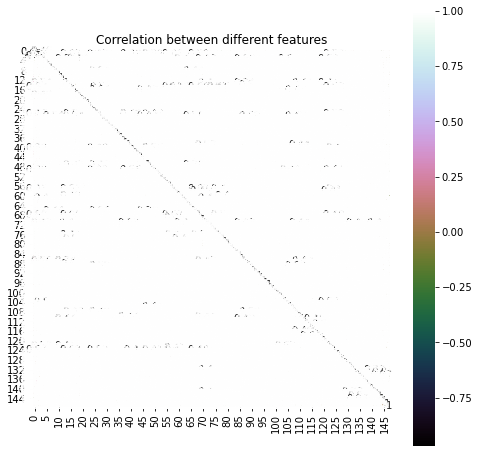

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')
 
plt.title('Correlation between different features')

In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvector shape', eig_vecs.shape)

print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvalues shape', eig_vals.shape)

Eigenvectors 
[[-1.61057031e-01+0.j  1.10052250e-01+0.j -2.32012704e-02+0.j ...
  -1.14574809e-16+0.j -4.39172429e-16+0.j  0.00000000e+00+0.j]
 [ 1.32541107e-01+0.j -2.46194734e-01+0.j -4.68550186e-02+0.j ...
  -1.50014205e-16+0.j -1.58417678e-15+0.j  0.00000000e+00+0.j]
 [ 2.41951464e-02+0.j -1.34586713e-01+0.j -8.74123098e-02+0.j ...
  -5.49337981e-17+0.j  8.67450783e-16+0.j  0.00000000e+00+0.j]
 ...
 [-4.81053816e-02+0.j -1.13147861e-01+0.j  1.16736663e-01+0.j ...
  -8.16390620e-02+0.j  1.92919687e-02+0.j  0.00000000e+00+0.j]
 [ 3.52400910e-02+0.j -2.94184853e-02+0.j -7.61944176e-03+0.j ...
  -2.05232419e-02+0.j  4.84980757e-03+0.j  0.00000000e+00+0.j]
 [ 3.90620859e-02+0.j  1.19977335e-01+0.j -1.14282043e-01+0.j ...
  -8.20242250e-02+0.j  1.93829858e-02+0.j  0.00000000e+00+0.j]]
Eigenvector shape (148, 148)

Eigenvalues 
[ 9.83009961e+00+0.00000000e+00j  7.64919591e+00+0.00000000e+00j
  3.87410300e+00+0.00000000e+00j  3.56268415e+00+0.00000000e+00j
  2.92737052e+00+0.00000000e+00j 

In [22]:
V = np.linalg.eig(cov_mat)
print("shape of V:", len(V))
print(V)

shape of V: 2
(array([ 9.83009961e+00+0.00000000e+00j,  7.64919591e+00+0.00000000e+00j,
        3.87410300e+00+0.00000000e+00j,  3.56268415e+00+0.00000000e+00j,
        2.92737052e+00+0.00000000e+00j,  2.57396188e+00+0.00000000e+00j,
        2.42339283e+00+0.00000000e+00j,  2.19536064e+00+0.00000000e+00j,
        2.10236287e+00+0.00000000e+00j,  2.01352194e+00+0.00000000e+00j,
        1.97293783e+00+0.00000000e+00j,  1.88734677e+00+0.00000000e+00j,
        1.81445215e+00+0.00000000e+00j,  1.79630953e+00+0.00000000e+00j,
        1.74673352e+00+0.00000000e+00j,  1.62719543e+00+0.00000000e+00j,
        1.57847800e+00+0.00000000e+00j,  1.49815461e+00+0.00000000e+00j,
        6.78699908e-02+0.00000000e+00j,  8.41666604e-02+0.00000000e+00j,
        1.59553400e-01+0.00000000e+00j,  1.65429981e-01+0.00000000e+00j,
        1.86441206e-01+0.00000000e+00j,  1.93458790e-01+0.00000000e+00j,
        2.17671738e-01+0.00000000e+00j,  1.48557035e+00+0.00000000e+00j,
        1.44777704e+00+0.00000000e+0

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvector shape', eig_vecs.shape)

print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvalues shape', eig_vals.shape)

In [23]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [24]:
V_old = eig_vecs
eigvals = eig_vals
V_sort, D_sort = eigsort(V_old, eigvals)

<ipython-input-23-51f6e317775b>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  Vsort[:,i] = V[:,index[i]]


In [28]:
#sorted eigenvalues 
print('Unsorted Eigenvalues: \n', eigvals)
print('\nSorted Eigenvalues: \n', D_sort)

#sorted eigenvectors
print('\nUnsorted eigenvectors: \n', V_old)
print('\nSorted Eigenvectors: \n', V_sort)

Unsorted Eigenvalues: 
 [ 9.83009961e+00+0.00000000e+00j  7.64919591e+00+0.00000000e+00j
  3.87410300e+00+0.00000000e+00j  3.56268415e+00+0.00000000e+00j
  2.92737052e+00+0.00000000e+00j  2.57396188e+00+0.00000000e+00j
  2.42339283e+00+0.00000000e+00j  2.19536064e+00+0.00000000e+00j
  2.10236287e+00+0.00000000e+00j  2.01352194e+00+0.00000000e+00j
  1.97293783e+00+0.00000000e+00j  1.88734677e+00+0.00000000e+00j
  1.81445215e+00+0.00000000e+00j  1.79630953e+00+0.00000000e+00j
  1.74673352e+00+0.00000000e+00j  1.62719543e+00+0.00000000e+00j
  1.57847800e+00+0.00000000e+00j  1.49815461e+00+0.00000000e+00j
  6.78699908e-02+0.00000000e+00j  8.41666604e-02+0.00000000e+00j
  1.59553400e-01+0.00000000e+00j  1.65429981e-01+0.00000000e+00j
  1.86441206e-01+0.00000000e+00j  1.93458790e-01+0.00000000e+00j
  2.17671738e-01+0.00000000e+00j  1.48557035e+00+0.00000000e+00j
  1.44777704e+00+0.00000000e+00j  2.43618944e-01+0.00000000e+00j
  2.70337459e-02+0.00000000e+00j  1.38834696e+00+0.00000000e+00j
 

In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
9.83009961242843
7.649195912540846
3.874103003923632
3.5626841465484613
2.92737052325375
2.573961877879717
2.4233928310426736
2.1953606397607968
2.102362865629163
2.01352194444693
1.9729378251910727
1.8873467657608423
1.814452153836387
1.7963095332480874
1.746733518153825
1.6271954315783002
1.5784779973195986
1.4981546109257222
1.4855703548112815
1.447777035584615
1.3883469588878212
1.3835429944966546
1.3143543939880984
1.307122392529533
1.283521178200125
1.2531601704645767
1.246453865054136
1.2291311691848046
1.218009406990544
1.21624908458707
1.191246255690906
1.1746947798600684
1.1736699429632653
1.155414517475962
1.143713388642919
1.1357586960236932
1.1282229137059243
1.1202593166991799
1.109859147848533
1.0987629279465552
1.0881025752682776
1.0837799216535138
1.0733555315433974
1.0691975950856758
1.0607662813723702
1.055160847592959
1.0482888345899553
1.0385401549745166
1.0356440982247095
1.0260230399246235
1.020771523366057
1.0163443459588979
1.01

In [41]:
#determine number of principal components by using variance
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
type(var_exp)

list

ValueError: shape mismatch: objects cannot be broadcast to a single shape

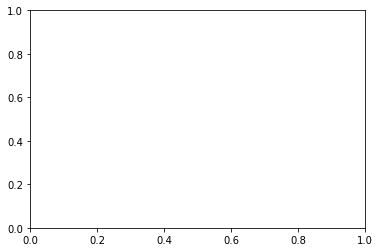

In [35]:
plt.bar(range(7), var_exp, alpha=0.5, align='center',
            label='individual explained variance')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

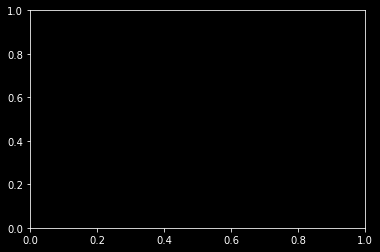

In [36]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(150), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Text(0, 0.5, 'Cumulative explained variance')

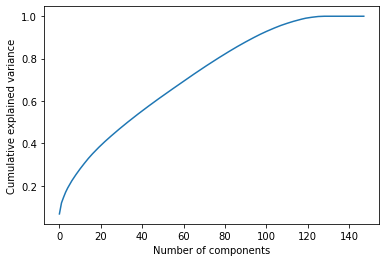

In [52]:
pca = PCA().fit(X_std
                
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [75]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

principal_df = pd.DataFrame(data = Y_sklearn, columns = ['PC1', 'PC2', 'PC3'])
principal_df
# print("shape of y_sklearn:", Y_sklearn.shape)
# Y_sklearn

PC1       PC2       PC3
0      1.922746 -1.750429  2.421578
1      0.509643 -1.891257  0.602542
2      9.204048  3.206807 -0.481406
3     -1.819333 -1.950818 -0.148081
4      1.064382 -1.040830 -0.051696
...         ...       ...       ...
13564 -3.407039  3.783715  0.908377
13565 -3.780958  5.937621  0.582670
13566 -4.373203  9.544946 -0.968873
13567 -4.532299  7.010951  1.198962
13568 -3.934046  7.035793  0.019198

[13569 rows x 3 columns]

In [90]:
#add target column to dataframe for coloring purposes
target = list(df.columns)
target

['Width',
 'Height',
 'Depth',
 'Volume',
 'Band Count',
 'RAM_TYPE_DDR SDRAM',
 'RAM_TYPE_DDR2 SDRAM',
 'RAM_TYPE_DDR3 SDRAM',
 'RAM_TYPE_DDR3L SDRAM',
 'RAM_TYPE_EDO DRAM',
 'RAM_TYPE_LPDDR SDRAM',
 'RAM_TYPE_LPDDR2 SDRAM',
 'RAM_TYPE_LPDDR3 SDRAM',
 'RAM_TYPE_LPDDR4 SDRAM',
 'RAM_TYPE_LPDDR4x SDRAM',
 'RAM_TYPE_LPDDR5 SDRAM',
 'RAM_TYPE_SDRAM',
 'RAM_TYPE_SRAM',
 'RAM_TYPE_Yes',
 'DISPLAY_TYPE_AM-OLED display',
 'DISPLAY_TYPE_CSTN LCD display',
 'DISPLAY_TYPE_Color ASV TFT LCD display',
 'DISPLAY_TYPE_Color IPS TFT LCD display',
 'DISPLAY_TYPE_Color MVA TFT LCD display',
 'DISPLAY_TYPE_Color PLS TFT LCD display',
 'DISPLAY_TYPE_Color PM-OLED display',
 'DISPLAY_TYPE_Color PVA TFT LCD display',
 'DISPLAY_TYPE_Color TN-TFT LCD display',
 'DISPLAY_TYPE_MSTN LCD display',
 'DISPLAY_TYPE_Yes',
 'DISPLAY_TYPE_mono E Ink display',
 'ScratchResistantScreen_Arc Glass',
 'ScratchResistantScreen_Concore Glass',
 'ScratchResistantScreen_DragonTrail',
 'ScratchResistantScreen_DragonTrail X',
 'S

In [104]:
fig = px.scatter_3d(principal_df, x="PC1", y="PC2", z="PC3", color = "PC1")
fig.show()

In [100]:
pca = PCA(n_components=2)
Y_2sklearn = pca.fit_transform(X_std)

principal_df2 = pd.DataFrame(data = Y_2sklearn, columns = ['PC1', 'PC2'])
principal_df2
# print("shape of y_sklearn:", Y_sklearn.shape)
# Y_sklearn

PC1       PC2
0      1.922746 -1.750427
1      0.509644 -1.891226
2      9.204003  3.207346
3     -1.819328 -1.950850
4      1.064382 -1.040848
...         ...       ...
13564 -3.407037  3.783673
13565 -3.780954  5.937594
13566 -4.373202  9.544947
13567 -4.532305  7.011058
13568 -3.934042  7.035714

[13569 rows x 2 columns]

In [107]:
fig2 = px.scatter(principal_df2, x="PC1", y="PC2", color = "PC1")
fig2.show()

In [70]:
import plotly.express as px
from sklearn.decomposition import PCA

In [71]:
data = px.data.iris()

NameError: name 'color' is not defined

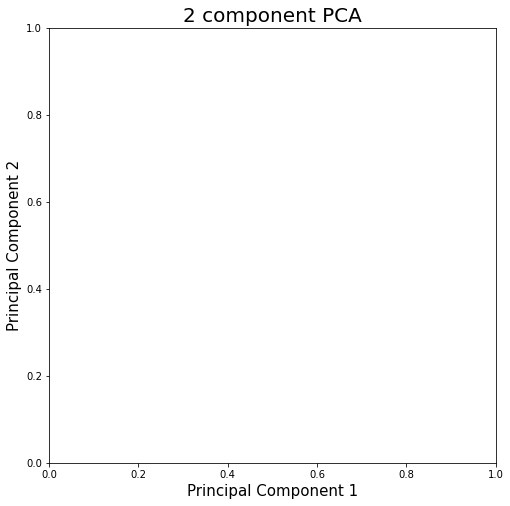

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']


# ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)

ax.scatter(principal_df['PC1'], principal_df['PC2'], c = color, s = 50)
    
ax.grid()

KeyError: 'PC1'

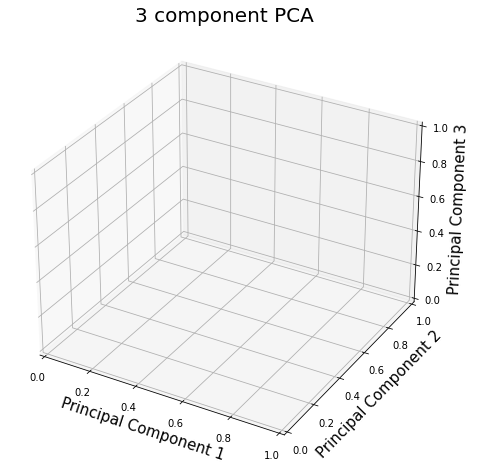

In [63]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')
# ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)

ax.scatter3D(principal_df.loc['PC1'], principal_df.loc['PC2'], principal_df.loc['PC3'], cmap="Greens")

In [113]:
df.shape

(13569, 149)

In [115]:
target_labels = df.columns
target_labels

Index(['Width', 'Height', 'Depth', 'Volume', 'Band Count',
       'RAM_TYPE_DDR SDRAM', 'RAM_TYPE_DDR2 SDRAM', 'RAM_TYPE_DDR3 SDRAM',
       'RAM_TYPE_DDR3L SDRAM', 'RAM_TYPE_EDO DRAM',
       ...
       'ProtectionFromLiquids_5 Protected against low pressure jets (all directions), limited ingress',
       'ProtectionFromLiquids_6 Protection against powerful jets of water',
       'ProtectionFromLiquids_7 Protected against immersion up to 1m of depth',
       'ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth',
       'ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs',
       'ProtectionFromLiquids_Non-standard protection',
       'ProtectionFromLiquids_Yes', 'DataIntegrity_Final',
       'DataIntegrity_Incomplete', 'DataIntegrity_Preliminary'],
      dtype='object', length=149)

In [121]:
df.head()

Width  Height  Depth        Volume  Band Count  RAM_TYPE_DDR SDRAM  \
0   76.6  162.91   8.95  111686.20870          14                   0   
1   76.5  156.30   8.40  100438.38000          21                   0   
2   76.1  159.20   8.30  100555.49600          20                   0   
3   73.7  145.10   9.45  101057.07150          12                   0   
4   71.3  148.95   8.39   89102.93265          21                   0   

   RAM_TYPE_DDR2 SDRAM  RAM_TYPE_DDR3 SDRAM  RAM_TYPE_DDR3L SDRAM  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   RAM_TYPE_EDO DRAM  ...  \
0                  0  ...   
1                  0  ...   
2                  0  ...   
3                  0  ...   
4                  0  ...   

   ProtectionFromLiquids_5 Protected against low pressure jets (all directions), limited ingress  \
0                                                  0                                               
1                                                  0                                               
2                                                  0                                               
3                                                  0                                               
4                                                  0                                               

   ProtectionFromLiquids_6 Protection against powerful jets of water  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   ProtectionFromLiquids_7 Protected against immersion up to 1m of depth  \
0                                                  0                       
1                                                  0                       
2                                                  0                       
3                                                  0                       
4                                                  0                       

   ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth  \
0                                                  0                        
1                                                  0                        
2                                                  1                        
3                                                  0                        
4                                                  0                        

   ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs  \
0                                                  0                                      
1                                                  0                                      
2                                                  0                                      
3                                                  0                                      
4                                                  0                                      

   ProtectionFromLiquids_Non-standard protection  ProtectionFromLiquids_Yes  \
0                                              0                          1   
1                                              0                          1   
2                                              0                          0   
3                                              0                          1   
4                                              0                          1   

In [126]:
df.iloc[:, 0:149].values

array([[ 76.6 , 162.91,   8.95, ...,   0.  ,   0.  ,   1.  ],
       [ 76.5 , 156.3 ,   8.4 , ...,   0.  ,   0.  ,   1.  ],
       [ 76.1 , 159.2 ,   8.3 , ...,   1.  ,   0.  ,   0.  ],
       ...,
       [ 82.  , 137.4 ,  18.4 , ...,   1.  ,   0.  ,   0.  ],
       [ 62.  , 125.  ,  14.  , ...,   1.  ,   0.  ,   0.  ],
       [ 69.7 , 117.  ,  18.  , ...,   1.  ,   0.  ,   0.  ]])

In [132]:
x_standard

array([[ 0.41242994,  0.94045379, -0.28238669, ..., -0.8483937 ,
        -0.12598344,  0.87593213],
       [ 0.40422248,  0.64342397, -0.41266869, ..., -0.8483937 ,
        -0.12598344,  0.87593213],
       [ 0.37139264,  0.77373963, -0.43635633, ...,  1.17869806,
        -0.12598344, -1.14164096],
       ...,
       [ 0.85563274, -0.2058746 ,  1.95609499, ...,  1.17869806,
        -0.12598344, -1.14164096],
       [-0.78585911, -0.76308636,  0.91383897, ...,  1.17869806,
        -0.12598344, -1.14164096],
       [-0.15388475, -1.12257782,  1.86134444, ...,  1.17869806,
        -0.12598344, -1.14164096]])

In [128]:
x_data = df.iloc[:, 0:149].values
x_standard = StandardScaler().fit_transform(x_data)

In [129]:
pca_x = PCA(n_components=2)
Y_2sklearn_x = pca_x.fit_transform(x_standard)

principal_df2_x = pd.DataFrame(data = Y_2sklearn_x, columns = ['PC1', 'PC2'])
principal_df2_x
# print("shape of y_sklearn:", Y_sklearn.shape)
# Y_sklearn

PC1       PC2
0      1.987141 -1.732875
1      0.589266 -1.916058
2      9.134531  3.405796
3     -1.755424 -2.009966
4      1.075642 -1.008290
...         ...       ...
13564 -3.551823  3.769902
13565 -3.980735  5.920401
13566 -4.420406  9.298796
13567 -4.730530  6.959542
13568 -4.057609  6.924225

[13569 rows x 2 columns]

In [130]:
fig2_x = px.scatter(principal_df2_x, x="PC1", y="PC2", color = "PC1")
fig2_x.show()